In [9]:
from packages import *
from domain import *
from taylor import *

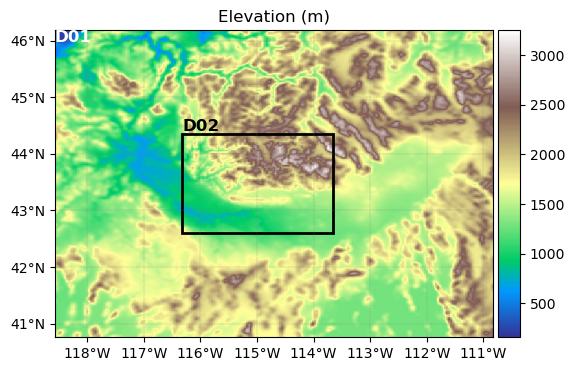

In [10]:
d01_path = '/bsuhome/stanleyakor/scratch/WY_22_THOMPSON/wrfout_d01_2021-09-29_00:00:00'
d02_path = '/bsuhome/stanleyakor/scratch/WY_22_THOMPSON/wrfout_d02_2021-09-29_00:00:00'

plot_wrf_domain(d01_path, d02_path, save=True)

In [11]:
path = '/bsuhome/stanleyakor/wateryear_2022/'
thompson = xr.open_dataset(path+ 'Thompson_22_daily.nc')
morrison = xr.open_dataset(path + 'MORRISON_22_daily.nc')
wsm6 = xr.open_dataset(path + 'WSM6_22_daily.nc')
wdm6 = xr.open_dataset(path + 'WDM6_22_daily.nc')
snodas_path = '/bsuhome/stanleyakor/Python-tutorial/wrf-python/SWE_nonan_snodas_WY_22.nc'
snodas_swe = regrid_snodas(d02_path, snodas_path, 'SWE', multiple_time = True)



#get lat/lon grid
la_lon = xr.open_dataset(d02_path)
lat = la_lon['XLAT'].isel(Time = 0)
lon = la_lon['XLONG'].isel(Time = 0)

In [12]:
thompson_peak = thompson['SNOW'].isel(XTIME = 184)
morrison_peak = morrison['SNOW'].isel(XTIME = 184)
wsm6_peak = wsm6['SNOW'].isel(XTIME = 184)
wdm6_peak = wdm6['SNOW'].isel(XTIME = 184)
snodas_peak = snodas_swe.isel(XTIME = 182)

In [13]:
files = [snodas_peak,wsm6_peak,wdm6_peak, thompson_peak,morrison_peak]
title = ['Snodas','WSM6', 'WDM6', 'Thompson', 'Morrison']

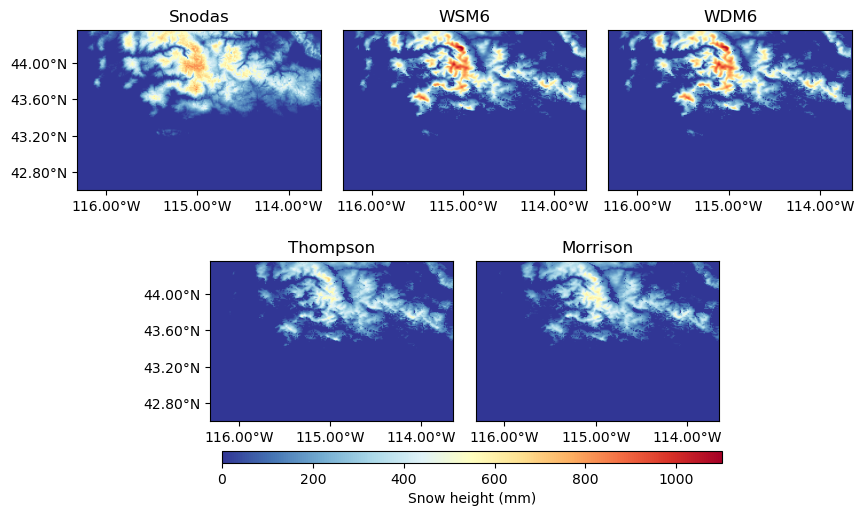

In [14]:
peak_compare(files, title,lat,lon,save_name = 'peak_swe_compare',save=True)

In [15]:
r2_th, rmse_th = float(calculate_r_squared(snodas_peak,thompson_peak)),float(calculate_mae(snodas_peak,thompson_peak))
r2_mor, rmse_mor = float(calculate_r_squared(snodas_peak,morrison_peak)), float(calculate_mae(snodas_peak,morrison_peak))
r2_wsm6, rmse_wsm6 = float(calculate_r_squared(snodas_peak,wsm6_peak)), float(calculate_mae(snodas_peak,wsm6_peak))
r2_wsm7, rmse_wdm6 = float(calculate_r_squared(snodas_peak,wdm6_peak)), float(calculate_mae(snodas_peak,wdm6_peak))

r2_list = [r2_th,r2_mor,r2_wsm6,r2_wsm7]
rmse_lis = [rmse_th,rmse_mor,rmse_wsm6,rmse_wdm6]
scheme = ['Thompson', 'Morrison', 'WSM6', 'WDM6']

for sch,value,value2 in zip(scheme,r2_list, rmse_lis):
    prnt = f'R2 score for {sch} = {value}, MAE = {value2}'
    print(prnt)

R2 score for Thompson = 0.6515641212463379, MAE = 53.10957717895508
R2 score for Morrison = 0.6480468809604645, MAE = 54.05158996582031
R2 score for WSM6 = 0.7716381847858429, MAE = 41.22027587890625
R2 score for WDM6 = 0.7767999023199081, MAE = 40.63654327392578


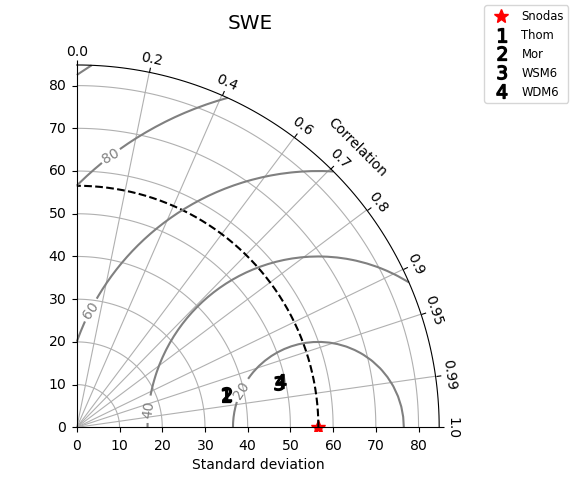

In [16]:
stdref, samples = prep_taylor(thompson, morrison, wsm6, wdm6, snodas_swe, 'SWE')
dia = test2(stdref, samples, 'SWE')
plt.savefig('taylor_swe.pdf', dpi = 300)